# Onboarding 
## Panda practice 
Let's start loading some useful modules.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.datasets import load_iris
import seaborn as sns

In [15]:
sns.set()

## 1.- We load the iris dataset as DF.

In [3]:
def load_iris_ds():
    load_dataset = load_iris()
    df = pd.DataFrame(data=load_dataset.data, 
                    columns=load_dataset.feature_names)
    df['species'] = load_dataset.target
    species = load_dataset.target_names
    species_dict = {0:species[0], 1:species[1], 2:species[2]}
    species_dict
    df['species'] = df['species'].map(species_dict)
    return df

df = load_iris_ds()

## 2.- We explore the dataset

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We have found that are four numerical features describing each flower and one categorical with the species for flower.

<Axes: ylabel='Frequency'>

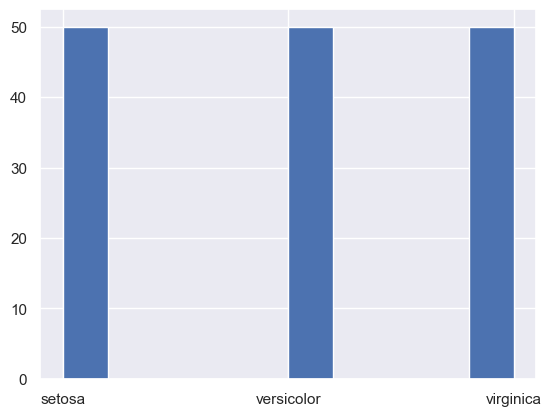

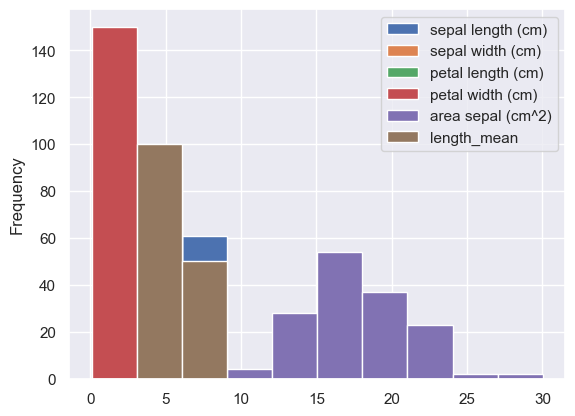

In [17]:
plt.hist(df['species'])
df.plot(kind='hist')

## 3.- Creating new features
a) Let's create a new feature called area_sepal made of the length_sepal times width_sepal.

In [8]:
df['area sepal (cm^2)'] = df['sepal length (cm)'] * df['sepal width (cm)']

b) Now respect the greater area we cathegorize the flower's areas, low < 33% < medium < 66% high.
First we calculate the max area.

In [9]:
max_area = df['area sepal (cm^2)'].max()
max_area

30.02

In [10]:
df['area_category'] = pd.cut(df['area sepal (cm^2)'], bins=[0, max_area/3, 2*max_area/3, max_area], labels=['Short', 'Medium', 'Long'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,area sepal (cm^2),area_category
0,5.1,3.5,1.4,0.2,setosa,17.85,Medium
1,4.9,3.0,1.4,0.2,setosa,14.70,Medium
2,4.7,3.2,1.3,0.2,setosa,15.04,Medium
3,4.6,3.1,1.5,0.2,setosa,14.26,Medium
4,5.0,3.6,1.4,0.2,setosa,18.00,Medium


## 4.- Obtaining average, std, max and min for each species

In [11]:
summary = df.groupby('species').agg(['mean', 'std', 'min', 'max'])
summary

/var/folders/72/rq138pj526q5bs7h79c9h7jr0000gp/T/ipykernel_1918/3888129254.py:1: FutureWarning: ['area_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary = df.groupby('species').agg(['mean', 'std', 'min', 'max'])


sepal length (cm)                     sepal width (cm)            \
                        mean       std  min  max             mean       std   
species                                                                       
setosa                 5.006  0.352490  4.3  5.8            3.428  0.379064   
versicolor             5.936  0.516171  4.9  7.0            2.770  0.313798   
virginica              6.588  0.635880  4.9  7.9            2.974  0.322497   

                     petal length (cm)                     petal width (cm)  \
            min  max              mean       std  min  max             mean   
species                                                                       
setosa      2.3  4.4             1.462  0.173664  1.0  1.9            0.246   
versicolor  2.0  3.4             4.260  0.469911  3.0  5.1            1.326   
virginica   2.2  3.8             5.552  0.551895  4.5  6.9            2.026   

                               area sepal (cm^2)                          
                 std  min  max              mean       std    min    max  
species                                                                   
setosa      0.105386  0.1  0.6           17.2578  2.933775  10.35  25.08  
versicolor  0.197753  1.0  1.8           16.5262  2.866882  10.00  22.40  
virginica   0.274650  1.4  2.5           19.6846  3.458783  12.25  30.02

## 5.- Showing all records where the sepal length is bigger that the specie average

With the mean values obtained above we can create a new column containing the mean for each species and use it to show the records greater than its own mean.

In [12]:
df['length_mean'] = df['species'].map(summary['sepal length (cm)', 'mean'])
filtered_df = df[df['sepal length (cm)'] > df['length_mean']]
filtered_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,area sepal (cm^2),area_category,length_mean
0,5.1,3.5,1.4,0.2,setosa,17.85,Medium,5.006
5,5.4,3.9,1.7,0.4,setosa,21.06,Long,5.006
10,5.4,3.7,1.5,0.2,setosa,19.98,Medium,5.006
14,5.8,4.0,1.2,0.2,setosa,23.20,Long,5.006
15,5.7,4.4,1.5,0.4,setosa,25.08,Long,5.006
...,...,...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica,20.77,Long,6.588
141,6.9,3.1,5.1,2.3,virginica,21.39,Long,6.588
143,6.8,3.2,5.9,2.3,virginica,21.76,Long,6.588
144,6.7,3.3,5.7,2.5,virginica,22.11,Long,6.588


## 6.- Using pipe and assing to repeat step 3.

In [13]:
df_iris = load_iris_ds()

In [14]:
def calc_sepal_area(DF):
    DF = DF.assign(sepal_area = DF['sepal length (cm)'] * DF['sepal width (cm)'])
    return DF
    
def categorize_sepal_area(DF):
    bins = [0, max_area/3, 2*max_area/3, max_area]
    labels = ['Short', 'Medium', 'Long']
    DF = DF.assign(area_category=pd.cut(DF['sepal_area'], bins=bins, labels=labels))
    return DF

df_iris = df_iris.pipe(calc_sepal_area).pipe(categorize_sepal_area)
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,sepal_area,area_category
0,5.1,3.5,1.4,0.2,setosa,17.85,Medium
1,4.9,3.0,1.4,0.2,setosa,14.70,Medium
2,4.7,3.2,1.3,0.2,setosa,15.04,Medium
3,4.6,3.1,1.5,0.2,setosa,14.26,Medium
4,5.0,3.6,1.4,0.2,setosa,18.00,Medium
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10,Long
146,6.3,2.5,5.0,1.9,virginica,15.75,Medium
147,6.5,3.0,5.2,2.0,virginica,19.50,Medium
148,6.2,3.4,5.4,2.3,virginica,21.08,Long
